Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vedang Bhelande"
COLLABORATORS = "Joseph Vera, Sparsh Vashist, Manny Benitez"

# Physics C170M/270M Lab 2: Naive Bayes 

In this lab, you will
- Incorporate the 8 steps of machine learning 
- Calculate a small Naive Bayes problem by hand
- Code a Gaussian Naive Bayes model to analyze the iris dataset. 
- Use scikit-learn and Naive Bayes models to make predictions
- Application of Naive Bayes in Astrophysics: classify stars at the center of our Galaxy

Reminder: save and checkpoint often!

Lab Created by: Tuan Do & Bernie Boscoe

Last updated by: Tuan Do

---

# Naive Bayes exercise by hand, with machine learning language
Bayes theorem:
$P(A \mid B) = \frac{P(A, B)}{P(B)} = \frac{P(B\mid A) \times P (A)}{P(B)}$
Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the prior of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Let $(x_{1},x_{2},…,x_{p})$ be a feature vector and y be the class label corresponding to this feature vector.
Applying Bayes’ theorem,

$$P(y \mid X) = \frac{P(X, y)}{P(X)} = \frac{P(X\mid y) \times P (y)}{P(X)}$$

where X is given as $ X=(x_{1},x_{2},…,x_{p})$. 
By substituting for X and expanding using the chain rule we get,

$$P(y \mid x_{1}, x_{2},..., x_{p}) = \frac{P(x_{1}, x_{2},..., x_{p}, y)}{P(x_{1}, x_{2},..., x_{p})} = \frac{P(x_{1}, x_{2},..., x_{p}\mid y) \times P (y)}{P(x_{1}, x_{2},..., x_{p})}$$

Since $ (x_{1},x_{2},…,x_{p})$ are independent of each other,

$$P(y \mid x_{1}, x_{2},..., x_{p}) = \frac{P (y) \times \prod_{i=1}^{p} P(x_{i} \mid y)}{\prod_{i=1}^{p} P(x_{i})}$$

For all entries in the dataset, the denominator does not change, it remains constant. Therefore, the denominator can be removed and a proportionality can be introduced:

$$P(y \mid x_{1}, x_{2},..., x_{p}) \propto P (y) \times \prod_{i=1}^{p} P(x_{i} \mid y)$$

In our scikit learn exercise, the response variable (y) has only two outcomes, binary (e.g., yes or no / positive or negative). There could be cases where the classification could be multivariate.

To complete the specification of our classifier, we adopt the MAP (Maximum A Posteriori) decision rule, which assigns the label to the class with the highest posterior.

$$\hat{y} = p(X, y) = p(y, x_{1}, x_{2},..., x_{p}) = \operatorname*{argmax}_{k \in \{1,2, ...,K\}} P (y) \times \prod_{i=1}^{p} P(x_{i} \mid y)$$

We calculate probability for all ‘K’ classes using the above function and take one with the maximum value to classify a new point belongs to that class.




Let's look at a naive bayes by hand example, using data science jargon. The data we will use is various aspects of weather conditions and a binary outcome, whether or not one plays golf.

The dataset is divided into two parts, namely, feature matrix and the response vector.

The feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of dependent features. In our dataset, features are ‘Temperature’, ‘Humidity’ and ‘Weather’.
Response vector contains the value of class variable(prediction or output) for each row of feature matrix. In our dataset, the class variable name is ‘Play golf’. Here is a list of the categorical features and the values they take, as well as the binary predicted value.

|Temperature         | Weather         | Humidity   | Play Golf |
| ------------- |-------------| ------|--------|
| Hot   | Sunny | High |Yes|
| Cold     | Rainy      |  Low |No

Let's look at ten events and outcomes:

|Temperature         | Weather         | Humidity   | Play Golf |
| ------------- |-------------| ------|--------|
| Hot   | Sunny | High |Yes|
| Hot    | Rainy      |  High |Yes|
| Hot   | Rainy | High |Yes|
| Cold     | Sunny |  Low |No|
| Hot   | Sunny | Low |No|
| Cold     | Rainy|  Low |No|
| Cold   | Sunny | High |Yes|
| Cold     | Rainy |  Low |No|
| Cold  | Sunny | High |No|
| Cold     | Rainy |  Low |Yes|

Just to clear, an example of a feature vector and corresponding class variable can be: (refer to 1st row of dataset)

X = (Hot, Sunny , High)

y = Yes

So basically, P(y|X) here means, the probability of “playing golf” given that the weather conditions are “Temperature is hot”, "sunny", and “high humidity”.

# Naive assumption

Now, its time to put a naive assumption to the Bayes’ theorem, which is, independence among the features. So now, we split evidence into the independent parts.

Now, if any two events A and B are independent, then,

P(A,B) = P(A)P(B)

So, finally, we are left with the task of calculating $P(y)$ and $P(x_i | y).$

Please note that $P(y)$ is also called the class probability and $P(x_i | y)$ is called the conditional probability.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i | y)$.

Let us try to apply the above formula manually on our weather dataset. For this, we need to do some precomputations on our dataset.

We need to find $P(x_i | y_j$) for each $x_i$ in $X$ and $y_j$ in y. 



Fill in the missing values, by computing the priors. (Just use a piece of paper, you will need them for a later question)

<div align="center">Temperature

|| Yes        | No | P(yes)|P(no)
| ------------- |-------------| ------|--------|----|
| Hot   | 3| 1 |3/5|1/5|
| Cold    | 2      | ?|P(Cold \| yes)=?|P(Cold \| no)=?|
| Total   |5| 5 |100%|100%|
</div>

<div align="center">Weather

|| Yes        | No | P(yes)|P(no)
| ------------- |-------------| ------|--------|----|
| Sunny   | 2| 3 |2/5|3/5|
| Rainy   | ?     |  ?|P(rainy \| yes)=?|P(Rainy \| no)=?|
| Total   |5| 5 |100%|100%|
</div>

<div align="center">Humidity

|| Yes        | No | P(yes)|P(no)
| ------------- |-------------| ------|--------|----|
| High   | 4| 1 |4/5|1/5|
| Low  | ?     |  ?|?|?|
| Total   |5| 5 |100%|100%|
</div>

## Question 1

(2 pts.) So, in the figures above, we have calculated $P(x_i | y_j)$ for each $x_i$ in $X$ and $y_j$ in $y $ manually in the tables 1-4. For example, probability of playing golf given that the temperature is cool, i.e P(temp. = cold | play golf = Yes) = 2/5.

Also, we need to find class probabilities $(P(y))$. For example, P(play golf = Yes) = 5/10.
<div align="center">Play Golf 
    

| Play     | P(yes)|P(no)
| ------------- | ------|--------|
| Yes |  5|?|
|No | 5|5/10|
| Total   |10| 100%|
</div>

today = (Sunny, Hot, Low)

so $P(Yes|today)$ = $P(Sunny | Yes)* P(Hot | Yes) * P(Low | Yes) * P(Yes)$ (we can ignore denominator)
= ?

<b style="color:red">Type in the four fractions below, and the result when you multiply them together.</b>

P(Sunny|Yes)=2/5, P(Hot|Yes)=3/5, P(Low|Yes)=1/5, P(Yes)=1/2, so P(Yes|today)=6/250

## Question 2

(1 pt.) Now, what is P(No | Today)?
Next, convert these two values into probabilities by making the sum equal to 1 (normalization):  example: P(Yes|today)/ P(Yes |today) + P(No | today)
<b style="color:red">Write the probability that golf will be played today.
How likely is it golf will be played today?</b>

Before normalization, P(No|Today)=12/250. 
Normalize: a(6/250 + 12/250) = 1 where a is normalization factor
a = 250/18 = 13.89
P(Golf will be played today) = (6/250)*(250/18) = 1/3

# Iris Classification with Naive Bayes

In this part of the assignment, you will again use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). Recall, it consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For a reference, see the following papers:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

Your goal is to construct a Naive Bayes classifier model that predicts the correct class from the sepal length and sepal width features. This lab will help learn about using probability distributions in the Naive Bayes classifier. 

In [2]:
# run this cell
#### PACKAGE IMPORTS ####
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
import pandas as pd
import seaborn as sns
%matplotlib inline

# Step 1: Look at the big picture

What is the problem you want to solve? How do you plan to use and benefit from the the machine learning model? What is your metric for success?

In this exercise, we will give you the goal and the metric:

**Machine Learning Goal**: classify irises based on the measurement of their petals. 

**Metric**: accuracy - defined as the number of correctly typed irises divided by the total number of irises


# Step 2: Get the data

What data are available to you for training your model? How will you access and download all the data? The type and quantity of data available will often impact your choice in the subsequent stages. 

Scikit Learn has a bunch of pre-built machine learning datasets that are helpful for learning new models and testing. 
#### Load and prepare the data

We will first read in the Iris dataset, and then split the dataset into training and test sets. The extra cell below the code solution is provided to check your work.

## Question 3


In [3]:
# (1 pt.) Load the iris dataset (hint: see how Lab 1 loaded the Iris dataset)

iris = datasets.load_iris()

# Step 3: Explore the data

Discover and visualize the data to gain insight. For example, are there more representatives of certain types of data than others?


## Question 4
(6 pts)

For this lab, please answer the following questions about your data. Use as many cells and plots as you like. 

<b style="color:red">1. What are the features? What is the label?   
2. Compute some summary statistics about your dataset. For example, the number of samples, mean, median, dispersion of the features.   
3. Plot some of the features to get a sense of the data.</b>

1. The features of the dataset are: sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm). The label is the target or iris species.

In [4]:
# Convert sklearn dataset to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
# print(iris)

In [5]:
iris.describe() # Part 2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0.5, 1.0, 'Scatterplot of Sepal Length v/s Petal Length')

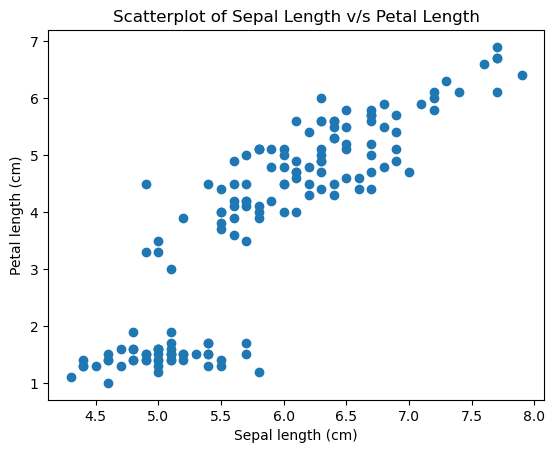

In [6]:
plt.scatter(iris['sepal length (cm)'], iris['petal length (cm)']) # Question 3
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.title("Scatterplot of Sepal Length v/s Petal Length")

Text(0.5, 1.0, 'Scatterplot of Sepal Width v/s Petal Width')

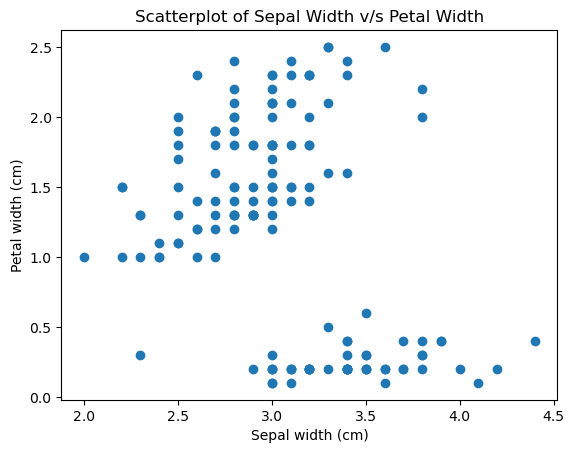

In [7]:
plt.scatter(iris['sepal width (cm)'], iris['petal width (cm)']) # Question 3
plt.xlabel("Sepal width (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatterplot of Sepal Width v/s Petal Width")

# Step 4: Prepare the data for ML algorithms

Machine learning algorithms often require data to be pre-processed in a certain way, such as scaling numerical values or map categories to other representations. You will also need to decide what data to use as training and as testing. You may also need to develop a strategy to deal with missing data. 

Use only the first two features: **sepal length** and **width** for this assignment

In [8]:
sepal_length = iris['sepal length (cm)']
sepal_width = iris['sepal width (cm)']

## Question 5

In [9]:
# (1 pt.) Create an array called data with the sepal length and width features and
# Create an array called targets with the target values
sepal_length = sepal_length.to_numpy()
sepal_width = sepal_width.to_numpy()

sepal_features = np.c_[sepal_length, sepal_width]
data = sepal_features

targets = iris['target'].to_numpy()
# Cast targets to integers to avoid errors later
targets = targets.astype('int64')

`sklearn` has a really helpful function called `train_test_split` that helps to randomly split your data and targets for training and testing. Please read the documentation on `train_test_split` before running the following cell. Note that there is an important keyword `test_size`. (Look at what random_seed can do for you as well, we will use that later.)

A short summary of terminology used below:

* **training** - data used in training the machine learning model
* **test** - data used to evaluate the performance of the model. Will use this information to further refine the model. 
* **validation** - the data left aside in the beginning only to be used at the very end when you are finished with your model and want to test on data the model has never seeen. 

In [10]:
# Run this code to randomly shuffle the data and make train and validation splits

x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(data, targets, test_size=0.1)

# now split the training data further into training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)


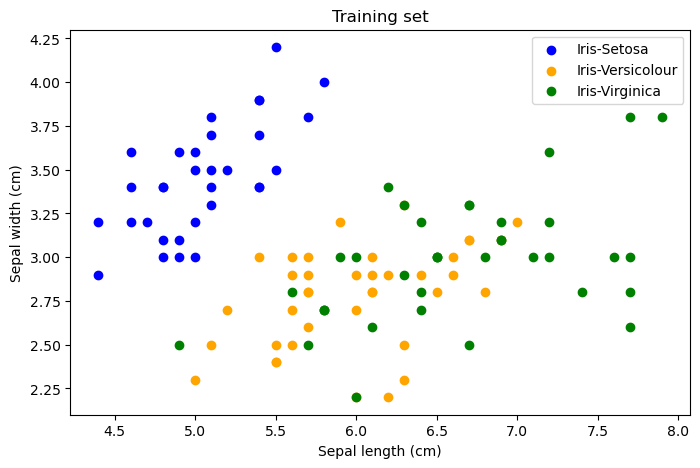

In [11]:
# Example of plotting the training data
labels = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}
label_colours = ['blue', 'orange', 'green']

def plot_data(x, y, labels, colours):
    for c in np.unique(y):
        inx = np.where(y == c)
        plt.scatter(x[inx, 0], x[inx, 1], label=labels[c], c=colours[c])
    plt.title("Training set")
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.legend()
    
plt.figure(figsize=(8, 5))
plot_data(x_train, y_train, labels, label_colours)

# Step 5: Select a model and train it

Based on the problem and the data, there are often a handful of algorithms to try. Here, experimentation and knowledge of the strengths and weaknesses of machine learning models will help you choose a model and train it.

In this lab, we will specifically use the Naive Bayes model. 
### Naive Bayes classifier

We will briefly review the Naive Bayes classifier model. The fundamental equation for this classifier is Bayes' rule:

$$
P(Y=y_k | X_1,\ldots,X_d) = \frac{P(X_1,\ldots,X_d | Y=y_k)P(Y=y_k)}{\sum_{k=1}^K P(X_1,\ldots,X_d | Y=y_k)P(Y=y_k)}
$$

In the above, $d$ is the number of features or dimensions in the inputs $X$ (in our case $d=2$), and $K$ is the number of classes (in our case $K=3$). The distribution $P(Y)$ is the class prior distribution, which is a discrete distribution over $K$ classes. The distribution $P(X | Y)$ is the class-conditional distribution over inputs.

The Naive Bayes classifier makes the assumption that the data features $X_i$ are conditionally independent give the class $Y$ (the 'naive' assumption). In this case, the class-conditional distribution decomposes as

$$
\begin{align}
P(X | Y=y_k) &= P(X_1,\ldots,X_d | Y=y_k)\\
&= \prod_{i=1}^d P(X_i | Y=y_k)
\end{align}
$$

This simplifying assumption means that we typically need to estimate far fewer parameters for each of the distributions $P(X_i | Y=y_k)$ instead of the full joint distribution $P(X | Y=y_k)$.

Once the class prior distribution and class-conditional densities are estimated, the Naive Bayes classifier model can then make a class prediction $\hat{Y}$ for a new data input $\tilde{X} := (\tilde{X}_1,\ldots,\tilde{X}_d)$ according to

$$
\begin{align}
\hat{Y} &= \text{argmax}_{y_k} P(Y=y_k | \tilde{X}_1,\ldots,\tilde{X}_d) \\
&= \text{argmax}_{y_k}\frac{P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=y_k)}{\sum_{k=1}^K P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=y_k)}\\
&= \text{argmax}_{y_k} P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=y_k)
\end{align}
$$

For this lab, we will use **Gaussian distributions** to describe the distribution of sepal length and width for each of the classes of irises. 

## 5a Compute the Priors
First, let's compute the priors for observing either three iris species. Without more information, we'll just use the fraction of each classes in the training data as the prior on that class. 

In [12]:
pri0 = len(y_train[y_train==0])/len(y_train)
pri1 = len(y_train[y_train==1])/len(y_train)
pri2 = len(y_train[y_train==2])/len(y_train)

## Question 6

In [13]:
# (1 pt.) Create an array called priors that has the prior probability of observing each class.
# Be sure to keep track of which class belongs to which element of the array!
priors = np.array([pri0, pri1, pri2])
print(priors)

[0.2962963  0.37037037 0.33333333]


## 5b Build the Naive Bayes Classifier



## Question 7

<b style="color:red">Build the Naive Bayes Classifier using Gaussian distributions. </b>

In [14]:
# (3 pt.) Build Classifier here

# Structure of classifer, assume Gaussian distribution for all features in classifier
def Gaussian(test_val, mu, sigma2): # mu = mean, sigma2 = variance
    return (1/np.sqrt(2*np.pi*sigma2))*np.exp(-0.5*(np.square(test_val-mu)/sigma2))

def classifier(parameters, sepal_length, sepal_width, prior):
    # Compute all 3 classifer values
    iris0 = Gaussian(sepal_length, parameters[0], parameters[1])*Gaussian(sepal_width, parameters[2], parameters[3])*prior[0] # Index 0th element of priors array
    iris1 = Gaussian(sepal_length, parameters[4], parameters[5])*Gaussian(sepal_width, parameters[6], parameters[7])*prior[1]
    iris2 = Gaussian(sepal_length, parameters[8], parameters[9])*Gaussian(sepal_width, parameters[10], parameters[11])*prior[2]

    # Use np.argmax to find highest value corresponding to particular species
    class_vals = np.array([iris0, iris1, iris2])
    #print(class_vals)
    return np.argmax(class_vals)

## 5c Train the model

Training the model in this case is to determine the parameters of the Gaussians describing the joint probability of observing the sepal length or width with respect to the class. 


## Question 8

(3 pt.)<b style="color:red"> Using as many cells as you need, determine the parameters for the joint probability distribution.</b>

In [15]:
# Parameters needed to describe Gaussian are mean and std dev
len0 = x_train[:,0][y_train==0]
wid0 = x_train[:,1][y_train==0]
len1 = x_train[:,0][y_train==1]
wid1 = x_train[:,1][y_train==1]
len2 = x_train[:,0][y_train==2]
wid2 = x_train[:,1][y_train==2]

# Compute means and std devs
mean_len0 = np.mean(len0, dtype=np.float64)
var_len0 = np.var(len0, dtype=np.float64)
mean_wid0 = np.mean(wid0, dtype=np.float64)
var_wid0 = np.var(wid0, dtype=np.float64)
    
mean_len1 = np.mean(len1, dtype=np.float64)
var_len1 = np.var(len1, dtype=np.float64)
mean_wid1 = np.mean(wid1, dtype=np.float64)
var_wid1 = np.var(wid1, dtype=np.float64)

mean_len2 = np.mean(len2, dtype=np.float64)
var_len2 = np.var(len2, dtype=np.float64)
mean_wid2 = np.mean(wid2, dtype=np.float64)
var_wid2 = np.var(wid2, dtype=np.float64)

params = np.array([mean_len0, var_len0, mean_wid0, var_wid0, mean_len1, var_len1, 
          mean_wid1, var_wid1, mean_len2, var_len2, mean_wid2, var_wid2])

In [16]:
# Test cell to check classifier validity
correctness = 0
for i in range(len(y_train)):
    if y_train[i] == 0:
        if classifier(params, x_train[i,0], x_train[i,1], priors) == 0:
            correctness +=1
    if y_train[i] == 1:
        if classifier(params, x_train[i,0], x_train[i,1], priors) == 1:
            correctness +=1
    if y_train[i] == 2:
        if classifier(params, x_train[i,0], x_train[i,1], priors) == 2:
            correctness +=1
print("Accuracy of training set:", correctness/len(y_train))

Accuracy of training set: 0.8055555555555556


## 5d Test the model predictions

`sklearn` comes with a lot of useful routines to compute metrics for machine learning applications. In this lab, you'll use `accuracy_score` from `sklearn.metrics` to compute the model accuracy.

## Question 9

In [17]:
# (1 pt.) make a array called pred that is your prediction for most likely class given your test data
pred = np.array([])
for i in range(len(y_test)):
    pred = np.append(pred, classifier(params, x_test[i,0], x_test[i,1], priors))
#print(pred)

In [18]:
# this line will give you your accuracy score for the test data
score = accuracy_score(y_test, pred)
print(score)

0.7407407407407407


## Question 10

For this case, we will not modify our model, so we can just go ahead evaluate the accuracy of the validation data that you saved earlier. 

<b style="color:red">Below, find the accuracy of the validation data. </b>

In [19]:
# (1pt.) determine the accuracy score of your validation data
#print("y_validate:", y_validate)
validate_pred = np.array([])
for i in range(len(y_validate)):
    validate_pred = np.append(validate_pred, classifier(params, x_validate[i,0], x_validate[i,1], priors))
#print(validate_pred)
validate_score = accuracy_score(y_validate, validate_pred)
print(validate_score)

0.7333333333333333


Congratulations! You have now completed the iris classification. In this iris classification, we won't go through Steps 6 to 8 of the machine learning workflow, but we will in the next part of this lab. 

# Classifying Stars at the Galactic Center

The Galactic center contains a complex population of stars. Multiple generations of star formation have occured, including as recently as 4 to 6 million years ago. The most reliable way to determine the ages of the stars is measure their spectra to examine their spectral features. Generally stars near the supermassive black hole in Galactic center are old (> 1 billion years) or young (4-6 million years). The stars that are bright enough for us to see are young stars and massive (> 10 Msun) with high surface temperatures (>20,000K), or old stars in their red giant phase with lower mass (~1 Msun) and cool temperatures (3000 to 4000 K). This difference in temperature leads to very different spectral features. 

In the spectra below, there are two examples of young stars and one example of an old star. The young star spectra are classified as 'early-type'. Because the temperature is high, many electrons have been ionized from atoms in its atmosphere so few absorption lines remain. The most prominent absorption line for early-type stars in this wavelength region is from hydrogen (specifically, the Brackett gamma line). Sometimes, the temperature is so high that even the electron in hydrogen is ionized, so there is very little hydrogen absorption. For the old red-giant stars, the temperatures are fairly low, so there are now many atomic absorption lines. The strongest lines in this wavelength range are from sodium (Na) atoms. In addition, because the temperature is cool, the hydrogen lines become less prominant because there is not enough high energy photons that are available to make those absorption lines. 

![gc_spectra](gc_spectra.png)

## Feature Engineering: Equivalent Widths and Cross-Correlation

To simplify and automate the process of classifying stars, we can reduce the spectrum (flux measurements at different wavelengths) into a more compact representation that hopefully still carries a lot of the information necessary for classification. In this case, we pick the strongest spectral lines (Br gamma and Na) and turn them into features for our machine learning models. We will use the concept of equilvalent width, which is related to the depth of the absorption features. In the figure above, the shaded blue regions represent the equivalent widths of the lines. The stronger the lines, the large the equivalent widths. For more details see: https://en.wikipedia.org/wiki/Equivalent_width. We will define positive equivalent widths as absorption lines (like in the figure above), and negative equivalent widths as emission lines. 

We will also use the cross-correlation coefficient of the spectra with templates as a potential feature. This feature is the maximum from cross-correlating a template young star and old star spectrum with the observed spectrum. You can think of this correlation coefficient as how closely matched the observed spectrum is with a template spectrum. The correlation in principle should go from 0 to 1. With 0 meaning it is not at all alike and 1 being an identical match. The correlation coefficent given in the data for this lab varies widely because the observed spectra often have more noise the the spectrum above and we only cross correlate the observed spectra with one model young star and one model old star. There are also intrinsic variations in the spectra that can also reduce the correlations. 

The dataset you'll be using has the equivalent widths and cross correlation coefficient measured using an automated method for spectra that have first been classified by humans, so there are labels. 

# Step 1: Look at the big picture

What is the problem you want to solve? How do you plan to use and benefit from the the machine learning model? What is your metric for success?

In this lab, we will give you the goal and the metric

**Lab goal**: classify stars at the Galactic center into young or old. 

**Metric**: accuracy - defined as the number of correctly typed stars divided by the total number of stars


# Step 2: Get the data

What data are available to you for training your model? How will you access and download all the data? The type and quantity of data available will often impact your choice in the subsequent stages. 

Here, the data is straightforward. We have provided you with the training data in the file ``galactic_center_stars_training.csv``

In the training data, there should be 8 columns: Na equivalent width, Na equivalent width error, correlation coefficient with an old star template, Br gamma equivalent width, Br gamma equivalent width uncertainty, signal-to-noise ratio of the spectrum, and young or old. The units of equilvalent widths and their uncertainties are in Angstroms. The correlation coefficients are unit-less. 

There is also a file called ``galactic_center_stars_eval.csv`` that has no labels. We'll be using that file to grade this assignment. 


## Question 11

In [20]:
# (1 pt.) In this cell, load the training data and the data for grading into two pandas data frames. 
# and check that they are there by looking at each head.
training_data = pd.read_csv('galactic_center_stars_training.csv')
eval_data = pd.read_csv('galactic_center_stars_eval.csv')

# Step 3: Explore the data

Discover and visualize the data to gain insight. For example, how complete is the dataset? Are there more representatives of certain types of data than others?


## Question 12
(6 pts)

For this lab, please answer the following questions about your data. Use as many cells and plots as you like. 

<b style="color:red">1. What are the features? What is the label?   
2. Compute some summary statistics about your dataset. For example, the number of samples, mean, median, dispersion of the features.   
3. Plot some of the features to get a sense of the data. </b>

In [21]:
# use as many cells as you need to explore the data. We will be grading manually
print(training_data.head())

     Na  Na_err  Corr    Br  Br_err  Yng_corr    SNR Type
0  1.11    0.91  0.81  2.57    0.53      0.54  17.69  old
1  5.40    0.78  0.77  0.98    0.26      0.36  20.74  old
2  5.71    0.80  0.81  0.96    0.22      0.34  20.23  old
3  2.54    1.45  0.93  2.94    0.87      0.11  10.92  old
4  7.13    1.42  0.83  1.33    0.46      6.28  11.13  old


1. The features of the data are: 'Na, Na_err, Corr, Br, Br_err, Yng_err, SNR', and the label is 'type'.

In [22]:
print(eval_data.head())

     Na  Na_err  Corr    Br  Br_err  Yng_corr    SNR
0  5.30    0.67  0.89  0.45    0.13      0.29  24.41
1  5.53    1.73  0.85  1.00    0.45     31.12   9.06
2  0.75    1.90  0.53 -1.52    1.20     24.63   8.20
3  7.32    2.34  0.72  2.61    1.34      0.19   6.60
4  2.91    0.80  0.88  1.10    0.27      0.23  20.12


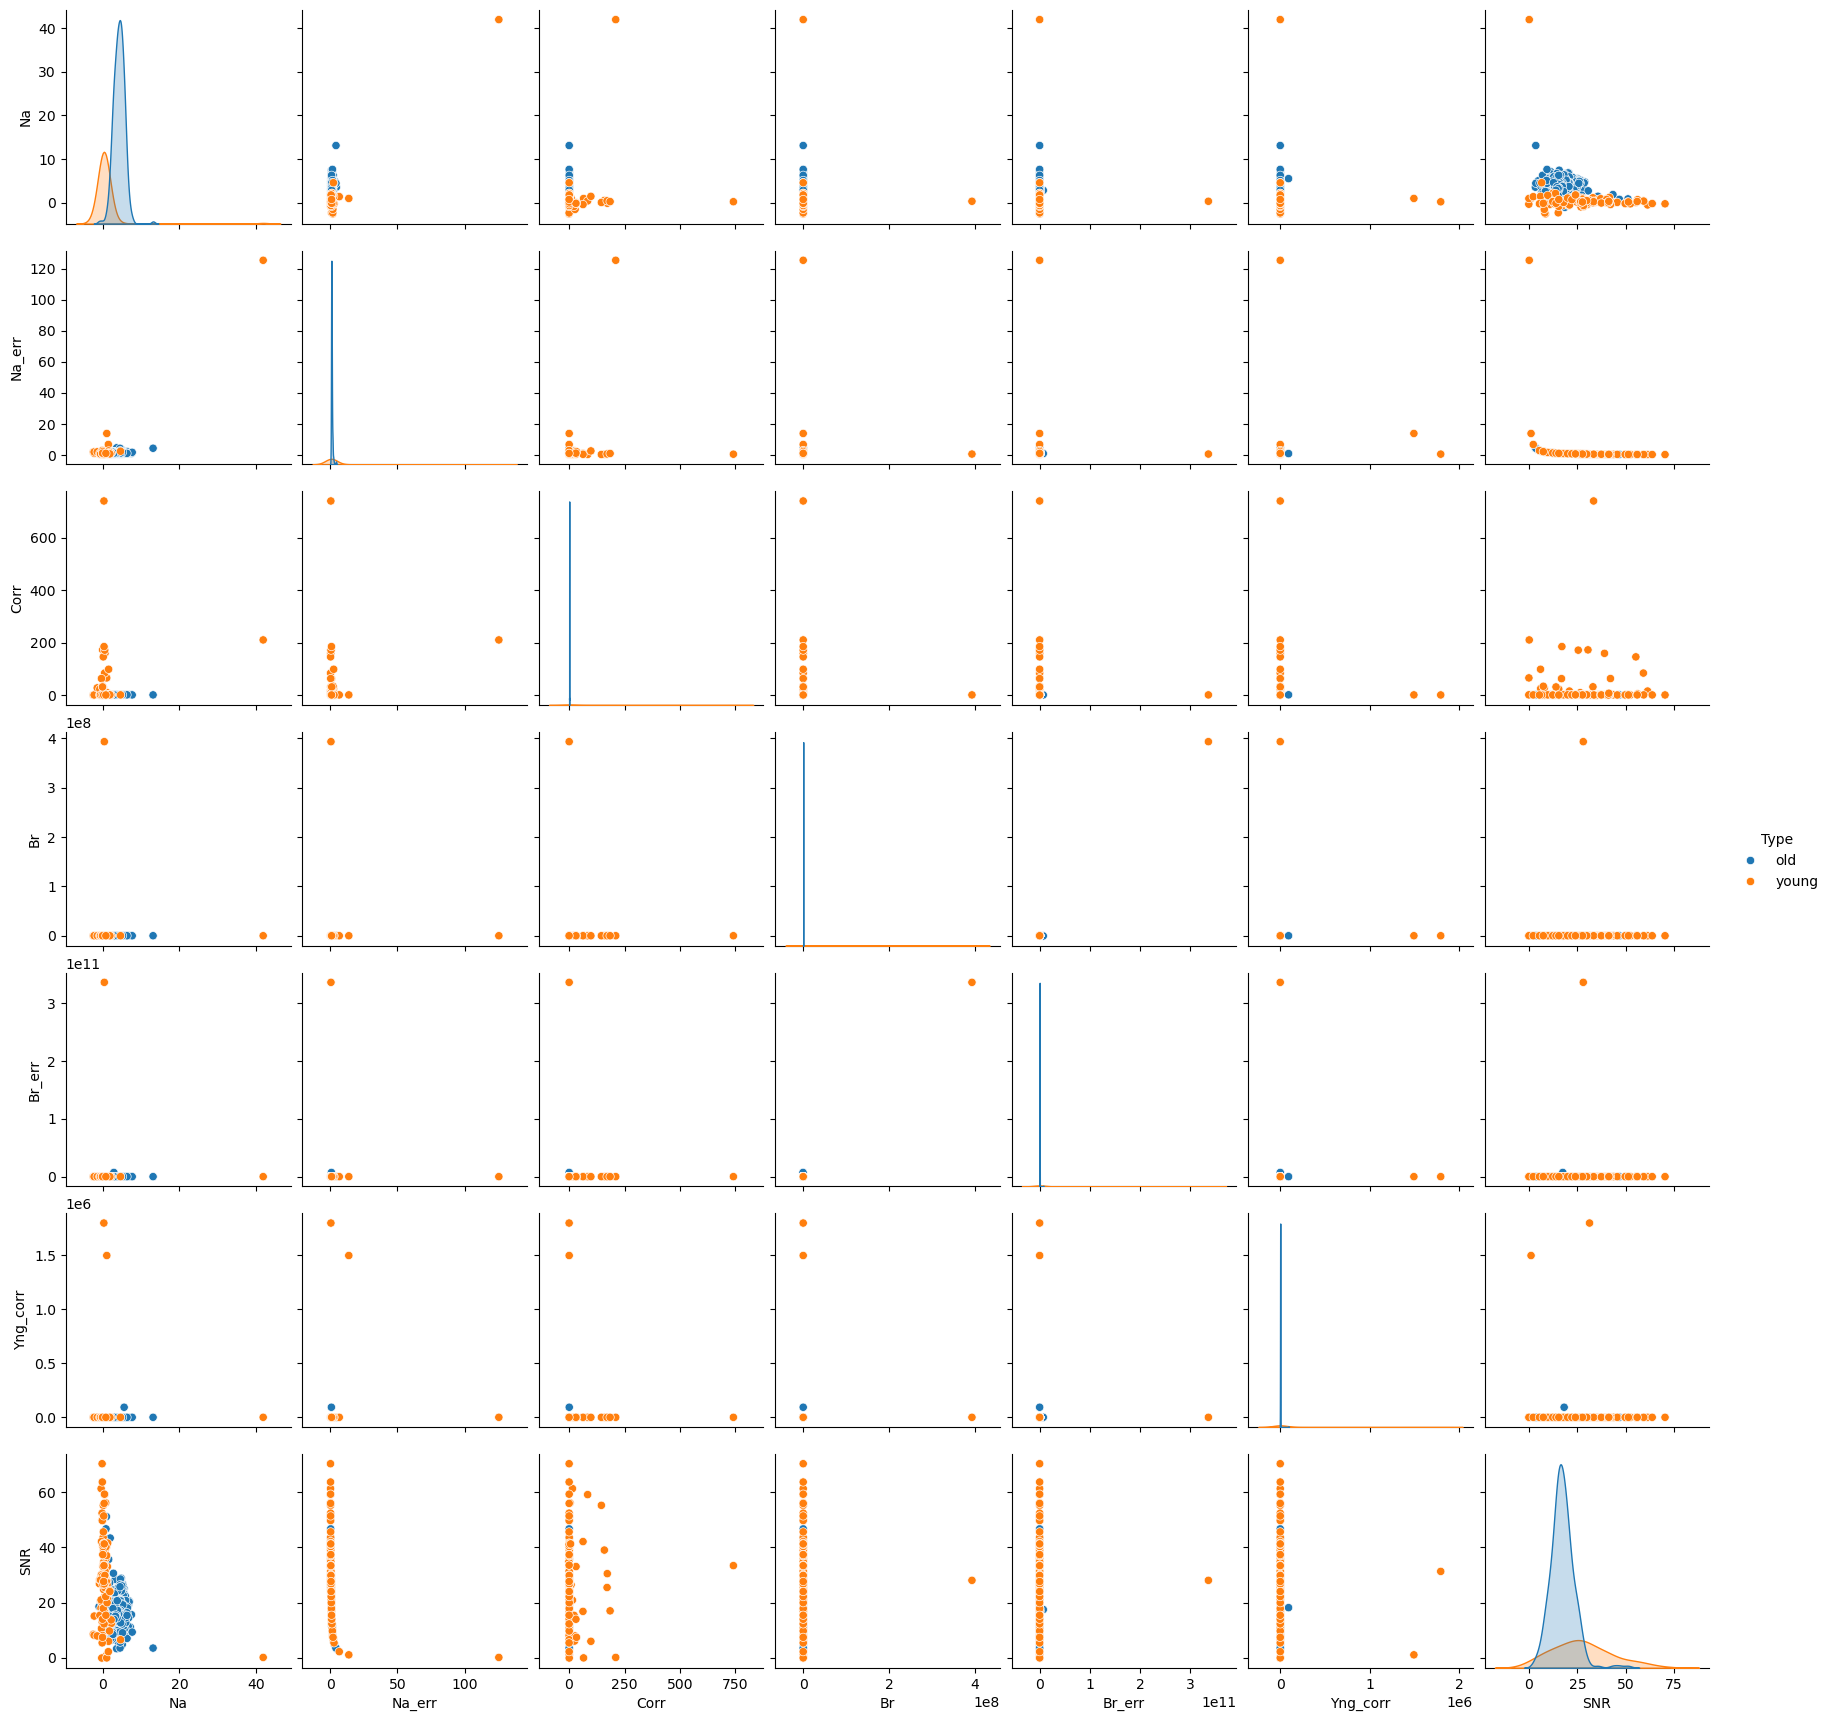

In [23]:
sns.pairplot(training_data, hue="Type")

# Step 4: Prepare the data for ML algorithms

Machine learning algorithms often require data to be pre-processed in a certain way, such as scaling numerical values or map categories to other representations. You will also need to decide what data to use as training and as testing. You may also need to develop a strategy to deal with missing data. 

For this lab, we have already done the feature engineering to get the equivalent widths, their uncertainties, and the correlation coefficients. 

## Question 12
(6 pts)

While the features are already chosen, there are a number of other questions that need to be answered:

<b style="color:red">1. Are there bad data points or outliers?   
2. If there are outliers, what is your strategy for dealing with them?   
3. Apply your strategy for cleaning and dealing with the data, then split your training data into three parts: training, testing, and validation  </b>


1. There is no bad data, only data that can improve.
2. My strategy would be to discard that data points that lie outside the 3 sigma threshold. The only exception will be SNR where we will retain values above 10.

In [24]:
# use as many cells as you need two answer Question 12

# Drop indices which increase std dev of Br
training_data = training_data.drop(309)
training_data = training_data.drop(213)
training_data = training_data.drop(124)

In [25]:
# For Corr column, drop rows with corr < 0 and corr > 1
training_data = training_data[(training_data['Corr'] >= 0) & (training_data['Corr'] <= 1)]

In [26]:
# For Yng_corr column, drop rows with corr < 0 and corr > 1
training_data = training_data[(training_data['Yng_corr'] >= 0) & (training_data['Yng_corr'] <= 1)]

In [27]:
# Want SNR > 10 for to remove noisy data
training_data = training_data[training_data['SNR'] > 10]

In [28]:
# Remove anything outside of 3 sigma for Na measurements using median as central value
# We choose median since it is less prone to influence from outliers
Na_median = training_data['Na'].median()
Na_sigma = training_data['Na'].std()
training_data = training_data[(training_data['Na'] > (Na_median - 3*Na_sigma)) & (training_data['Na'] < (Na_median + 3*Na_sigma))]

In [29]:
# Remove anything outside of 3 sigma for Br measurements using median as central value
# We choose median since it is less prone to influence from outliers
Br_median = training_data['Br'].median()
Br_sigma = training_data['Br'].std()
training_data = training_data[(training_data['Br'] > (Br_median - 3*Br_sigma)) & (training_data['Br'] < (Br_median + 3*Br_sigma))]

In [30]:
# Repeat 3 sigma process with Na_err and Br_err for thoroughness
Na_err_median = training_data['Na_err'].median()
Na_err_sigma = training_data['Na_err'].std()
training_data = training_data[(training_data['Na_err'] > (Na_err_median - 3*Na_err_sigma)) & (training_data['Na_err'] < (Na_err_median + 3*Na_err_sigma))]

Br_err_median = training_data['Br_err'].median()
Br_err_sigma = training_data['Br_err'].std()
training_data = training_data[(training_data['Br_err'] > (Br_err_median - 3*Br_err_sigma)) & (training_data['Br_err'] < (Br_err_median + 3*Br_err_sigma))]
#print(training_data)

In [31]:
# Describe your process, clean the data, and show clean_training.describe()
clean_training = training_data
clean_training.describe()

,Na,Na_err,Corr,Br,Br_err,Yng_corr,SNR
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,3.237810,0.873102,0.676642,2.112263,0.596934,0.415219,21.313029
std,2.023165,0.281375,0.170742,2.269450,0.789717,0.193431,9.901578
min,-0.860000,0.240000,0.090000,-8.110000,0.100000,-0.000000,10.230000
25%,1.705000,0.672500,0.560000,0.962500,0.250000,0.280000,15.107500
50%,3.725000,0.875000,0.690000,1.680000,0.430000,0.390000,18.425000
75%,4.830000,1.060000,0.820000,3.077500,0.670000,0.540000,24.225000
max,7.440000,1.540000,0.940000,14.800000,7.870000,0.980000,70.290000


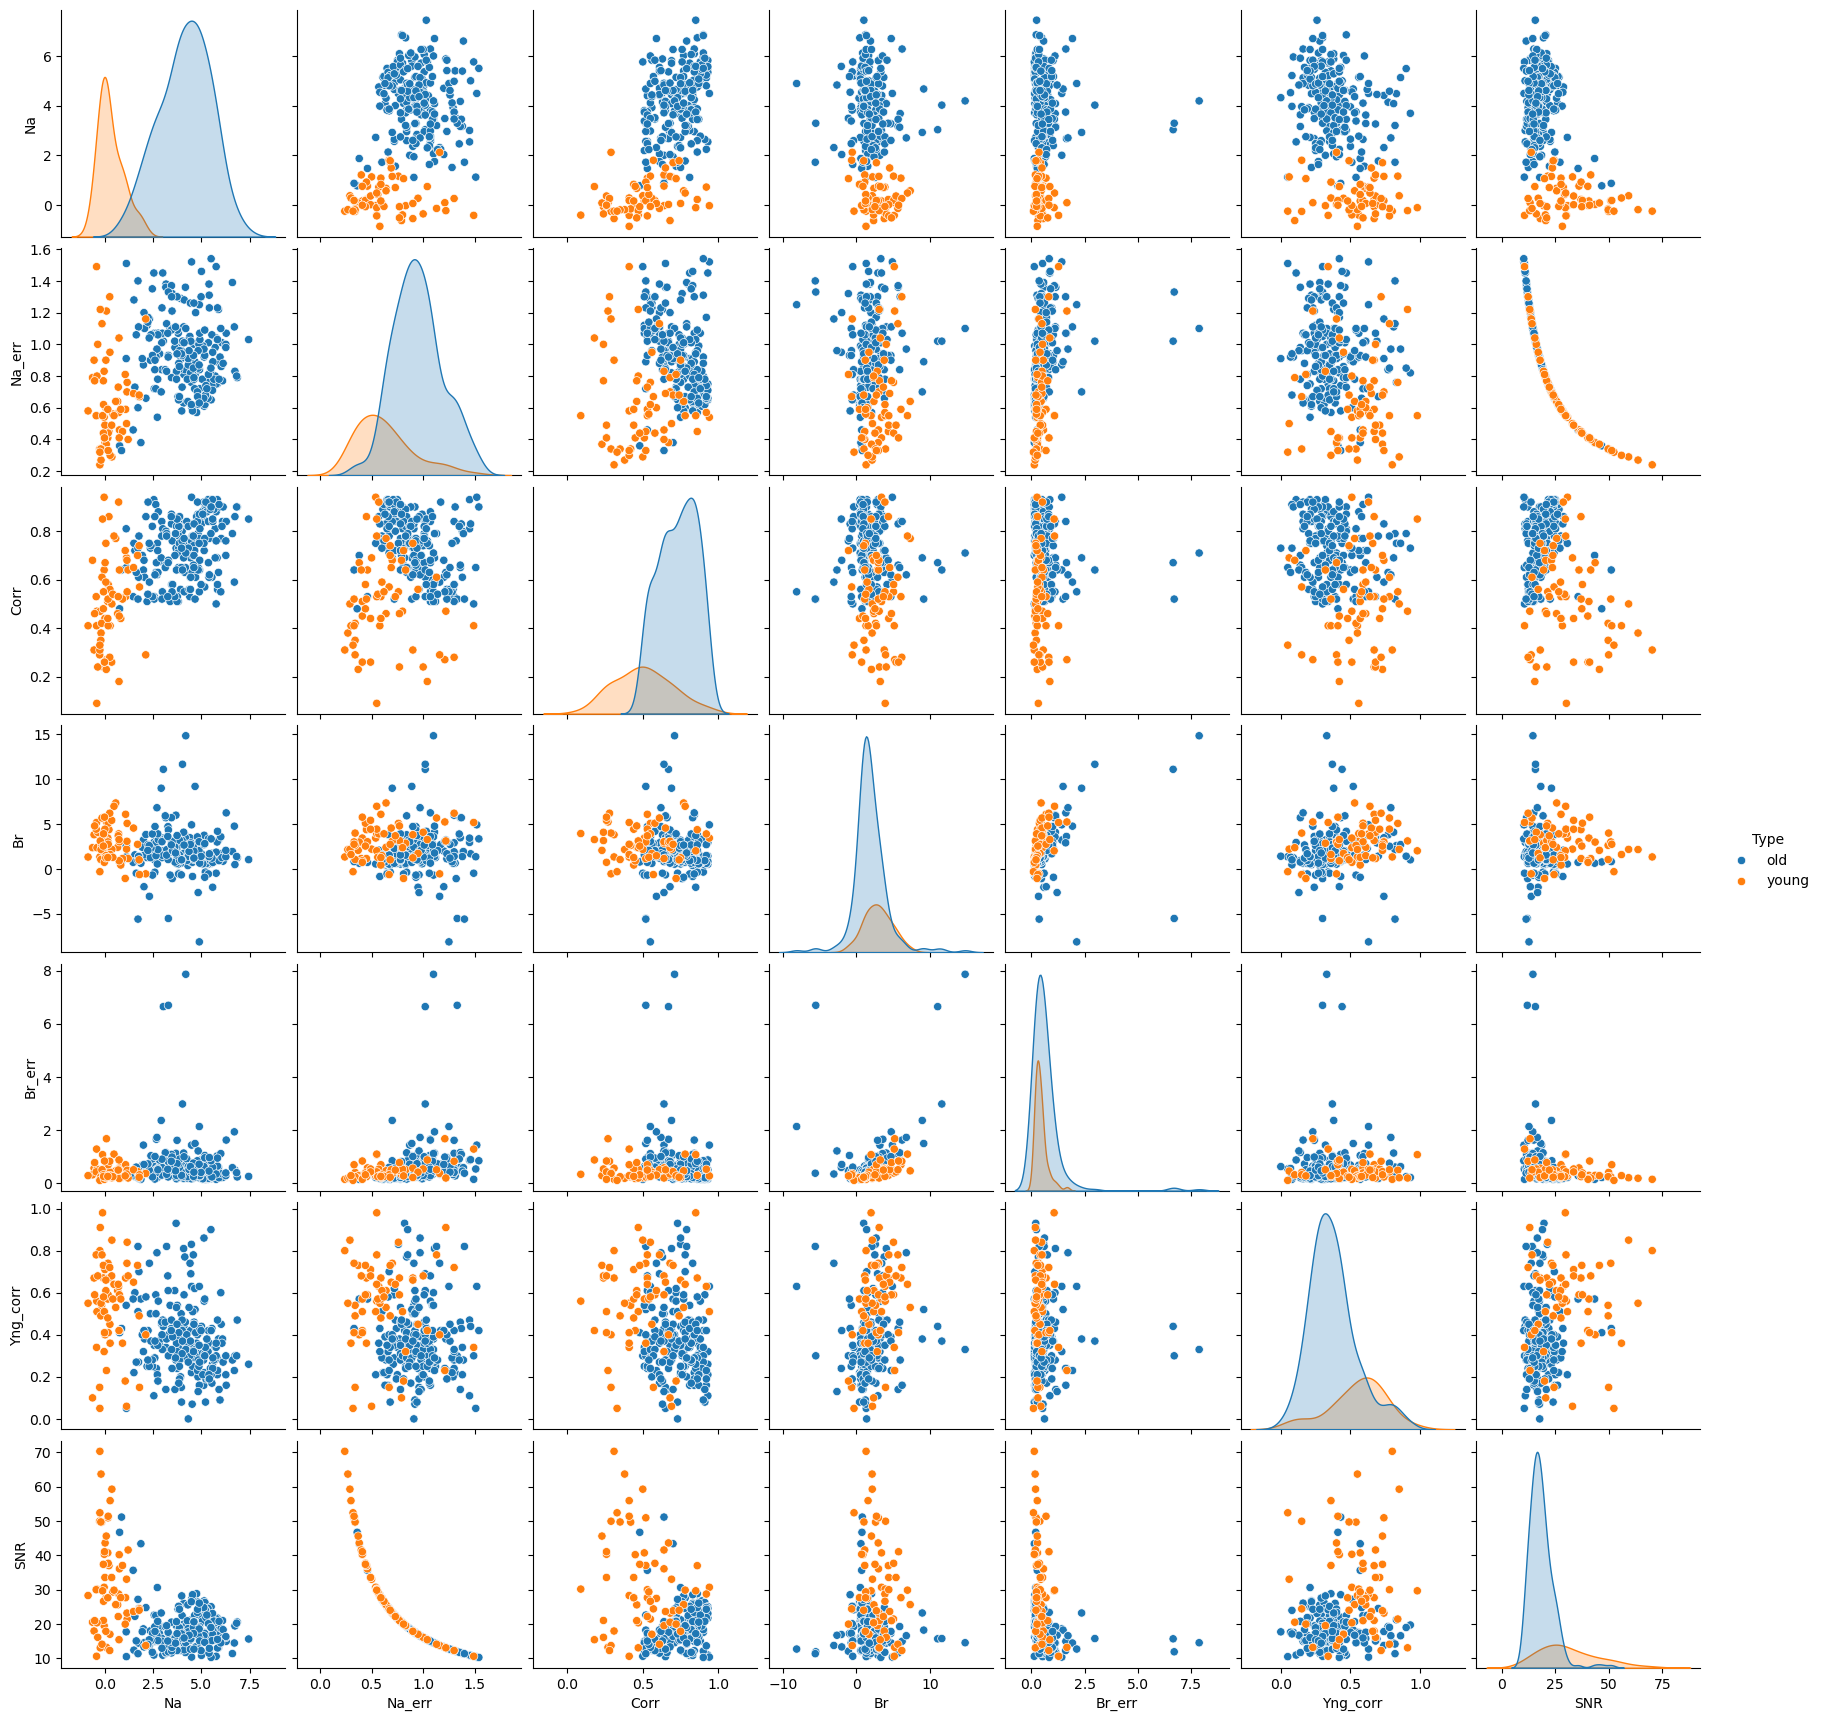

In [32]:
# Before splitting the training data into training, testing, and validation sets,
sns.pairplot(clean_training, hue="Type")

In [33]:
# After cleaning, split data into training, testing, and validation

# Convert dfs to aray for train_test_split
clean_training = np.array(clean_training)
clean_training_data = clean_training[:,:6]

# Convert type to numbers where young = 0 and old = 1
clean_training_targets = clean_training[:,7]
for i in range(len(clean_training_targets)):
    if clean_training_targets[i] == 'young':
        clean_training_targets[i] = 0
    if clean_training_targets[i] == 'old':
        clean_training_targets[i] = 1

# Cast targets to int64 lol
clean_training_targets = clean_training_targets.astype('int64')

# Randomly shuffle data into training and validation sets
x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(clean_training_data, clean_training_targets, test_size=0.15)

# now split the training data further into training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)

# Step 5: Select a model and train it

Based on the problem and the data, there are often a handful of algorithms to try. Here, experimentation and knowledge of the strengths and weaknesses of machine learning models will help you choose a model and train it.


## Question 13
(10 pts)

In this lab, we will specifically use the Naive Bayes model. 

In the following cells, please implement the Naive Bayes classifier to deterimine whether a star is young or old based on the features you've selected in Step 4.  
<b style="color:red">At the end of this step, report the accuracy of your model on the test data.</b> 

In [34]:
# use as many cells as you need to do Step 5. We will be grading manually

# The features we will be using in the Naive Bayes model are Na, Na_err, Br, Br_err, Corr, and Yng_corr. 
# We will disregard SNR as it is a threshold used to check if quality of data is reliable and doesn't necessarily tell us how 
# likely a star is to be old or young after a certain value.

def gcg_Gaussian(test_val, mu, sigma2): # mu = mean, sigma2 = variance
    return (1/np.sqrt(2*np.pi*sigma2))*np.exp(-0.5*(np.square(test_val-mu)/sigma2))

def gcg_classifier(pars, prior, Na, Na_err, corr, Br, Br_err, Yng_corr):
    # Compute both classifer values
    young_star = gcg_Gaussian(Na, pars[0], pars[2])*gcg_Gaussian(Na_err, pars[4], pars[6])*gcg_Gaussian(corr, pars[8], pars[10])*gcg_Gaussian(Br, pars[12], pars[14])*gcg_Gaussian(Br_err, pars[16], pars[18])*gcg_Gaussian(Yng_corr, pars[20], pars[22])*prior[0]
    old_star = gcg_Gaussian(Na, pars[1], pars[3])*gcg_Gaussian(Na_err, pars[5], pars[7])*gcg_Gaussian(corr, pars[9], pars[11])*gcg_Gaussian(Br, pars[13], pars[15])*gcg_Gaussian(Br_err, pars[17], pars[19])*gcg_Gaussian(Yng_corr, pars[21], pars[23])*prior[1]

    # Use np.argmax to find highest value corresponding to particular species
    class_vals = np.array([young_star, old_star])
    # print("class_vals:", class_vals)
    return np.argmax(class_vals)

In [35]:
young_prior = len(y_train[y_train==0])/len(y_train)
old_prior = len(y_train[y_train==1])/len(y_train)
gcg_priors = np.array([young_prior, old_prior])
#print(gcg_priors)

In [36]:
# Parameters needed to describe Gaussian are mean and std dev (variance works too!)

train_Na_mean_young = x_train[:,0][y_train==0].mean()
#print(train_Na_mean_young)
train_Na_mean_old = x_train[:,0][y_train==1].mean()
#print(train_Na_mean_old)

train_Na_var_young = x_train[:,0][y_train==0].var()
#print(train_Na_var_young)
train_Na_var_old = x_train[:,0][y_train==1].var()
#print(train_Na_var_old)

train_Na_err_mean_young = x_train[:,1][y_train==0].mean()
#print(train_Na_err_mean_young)
train_Na_err_mean_old = x_train[:,1][y_train==1].mean()
#print(train_Na_err_mean_old)

train_Na_err_var_young = x_train[:,1][y_train==0].var()
#print(train_Na_err_var_young)
train_Na_err_var_old = x_train[:,1][y_train==1].var()
#print(train_Na_err_var_old)

train_corr_mean_young = x_train[:,2][y_train==0].mean()
#print(train_corr_mean_young)
train_corr_mean_old = x_train[:,2][y_train==1].mean()
#print(train_corr_mean_old)

train_corr_var_young = x_train[:,2][y_train==0].var()
#print(train_corr_var_young)
train_corr_var_old = x_train[:,2][y_train==1].var()
#print(train_corr_var_old)

train_Br_mean_young = x_train[:,3][y_train==0].mean()
#print(train_Br_mean_young)
train_Br_mean_old = x_train[:,3][y_train==1].mean()
#print(train_Br_mean_old)

train_Br_var_young = x_train[:,3][y_train==0].var()
#print(train_Br_var_young)
train_Br_var_old = x_train[:,3][y_train==1].var()
#print(train_Br_var_old)

train_Br_err_mean_young = x_train[:,4][y_train==0].mean()
#print(train_Br_err_mean_young)
train_Br_err_mean_old = x_train[:,4][y_train==1].mean()
#print(train_Br_err_mean_old)

train_Br_err_var_young = x_train[:,4][y_train==0].var()
#print(train_Br_err_var_young)
train_Br_err_var_old = x_train[:,4][y_train==1].var()
#print(train_Br_err_var_old)

train_Yng_corr_mean_young = x_train[:,5][y_train==0].mean()
#print(train_Yng_corr_mean_young)
train_Yng_corr_mean_old = x_train[:,5][y_train==1].mean()
#print(train_Yng_corr_mean_old)

train_Yng_corr_var_young = x_train[:,5][y_train==0].var()
#print(train_Yng_corr_var_young)
train_Yng_corr_var_old = x_train[:,5][y_train==1].var()
#print(train_Yng_corr_var_old)

gcg_params = np.array([train_Na_mean_young, train_Na_mean_old, train_Na_var_young, train_Na_var_old,
                       train_Na_err_mean_young, train_Na_err_mean_old, train_Na_err_var_young, train_Na_err_var_old,
                       train_corr_mean_young, train_corr_mean_old, train_corr_var_young, train_corr_var_old,
                       train_Br_mean_young, train_Br_mean_old, train_Br_var_young, train_Br_var_old,
                       train_Br_err_var_young, train_Br_err_var_old, train_Br_err_var_young, train_Br_err_var_old,
                       train_Yng_corr_mean_young, train_Yng_corr_mean_old, train_Yng_corr_var_young, train_Yng_corr_var_old])

In [37]:
pred = []
for i in range(len(y_test)):
    pred = np.append(pred, gcg_classifier(gcg_params, gcg_priors, x_test[i,0], x_test[i,1], x_test[i,2], x_test[i,3], x_test[i,4], x_test[i,5]))

In [38]:
# Uncomment these and run when ready
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, pred)
#print("y_test:", y_test)
#print("pred:", pred)

print("The accuracy of this model on test data has an accuracy of", score*100, "%.")

The accuracy of this model on test data has an accuracy of 95.74468085106383 %.


# Step 6: Fine tune the model

Most machine learning algorithms will have hyperparameters that can be tuned to improve the performance of the model given the specific dataset. You may also want to visualize the results of model predictions to aid in tuning the model.


## Question 14
(9 pts)

For this lab, please do the following:  
<b style="color:red">
1. One of the hyperparameters in this case is the types of features to use. Try subtracting or adding a feature to see how it changes your accuracy.   
2. Examine how changes in your training data might affect your results. For example, what if you use only measurements with small uncertainties for training?   
3. Report your final accuracy on your test dataset after selecting the optimal model. Explain why you think this is the optimal model.</b> 

In [39]:
# use as many cells as you need to do Step 6. We will be grading manually

In [40]:
# 1. Will try removing corr to see how these uncertainity estimates affect the performance of classifier

def gcg_classifier_no_corrs(pars, prior, Na, Na_err, Br, Br_err):
    # Compute both classifer values
    young_star = gcg_Gaussian(Na, pars[0], pars[2])*gcg_Gaussian(Na_err, pars[4], pars[6])*gcg_Gaussian(Br, pars[12], pars[14])*gcg_Gaussian(Br_err, pars[16], pars[18])*prior[0]
    old_star = gcg_Gaussian(Na, pars[1], pars[3])*gcg_Gaussian(Na_err, pars[5], pars[7])*gcg_Gaussian(Br, pars[13], pars[15])*gcg_Gaussian(Br_err, pars[17], pars[19])*prior[1]

    # Use np.argmax to find highest value corresponding to particular species
    class_vals = np.array([young_star, old_star])
    #print("class_vals:", class_vals)
    return np.argmax(class_vals)

no_corrs_pred = []
for i in range(len(y_test)):
    no_corrs_pred = np.append(no_corrs_pred, gcg_classifier_no_corrs(gcg_params, gcg_priors, x_test[i,0], x_test[i,1], x_test[i,3], x_test[i,4]))

no_corr_score=accuracy_score(y_test, no_corrs_pred)
print("The accuracy of this model on test data after removing the corr feature has an accuracy of", no_corr_score*100, "%.")

assert(no_corrs_pred.all() == pred.all())

# Removing the corr and Yng_corr feature has less reduction in accuracy (about 0%-2%) compared to initial gcg_classifier.

The accuracy of this model on test data after removing the corr feature has an accuracy of 95.74468085106383 %.


In [41]:
# 2. Choosing data with small uncertainties = Choosing small Na_err and Br_err. We will still be using the initial classifier gcg_classifier.

# Will choose data to the left of the median for Na_err and Br_err to ensure less uncertainty of measurements
smol_uncertain_training_data = x_train[(x_train[:,1] <= np.median(x_train[:,1])) & (x_train[:,4] <= np.median(x_train[:,4]))]
sutd = smol_uncertain_training_data # Abbreviation for ease
smol_uncertain_training_targets = y_train[(x_train[:,1] <= np.median(x_train[:,1])) & (x_train[:,4] <= np.median(x_train[:,4]))]
# print("y_len:", len(smol_uncertain_training_targets))

# Training data is reduced to 43.1% of the initial set with 118 entries
#print(len(smol_uncertain_training_data))

smol_uncertain_pred = []
for i in range(len(smol_uncertain_training_targets)):
    smol_uncertain_pred = np.append(smol_uncertain_pred, gcg_classifier(gcg_params, gcg_priors, sutd[i,0], sutd[i,1], sutd[i,2], sutd[i,3], sutd[i,4], sutd[i,5]))

smol_score=accuracy_score(smol_uncertain_training_targets, smol_uncertain_pred)
# print("smol_uncertain_training_targets:", smol_uncertain_training_targets)
# print("smol_uncertain_pred:", smol_uncertain_pred)

print("The accuracy of this model on test data has an accuracy of", smol_score*100, "%.")

# Choosing Na_err and Br_err on left of median of test data reduces the accuracy of the initial gcg_classifier by 3-5%. This could 
# be due to the fact we treat errors like Gaussians giving the most value to the error values closest to the median which is not
# desired. More on this in my optimized model...

The accuracy of this model on test data has an accuracy of 89.0625 %.


3. Constructing the optimal model:

So far, we have been using Gaussians in our classifer to analyze the conditional probability of certain features on classes. While this may work well for features such as Na and Br where something close to the mean/median value is reliable, it is not well equipped to deal with features such as Na_err, Br_err, corr, Yng_corr. For features such as error, we would want a monotonically decreasing function to show that for less error in measurements, we can classify a star as young or old with greater confidence. For correlation it's the opposite, we want to use a function that will increase with increase in correlation value. I propose the following steps to build my optimal model:

    1. For P(err|Y), I will use an exponential function (e^-x) as the distibution function to attain the desired relation of increase in value of distribution with decrease in error. This will return a value between 0 and 1 to prevent the occurence of infinite values.
    2. For P(correlations|Y), I will just multiply the correlation value with the other terms in classifier to attain the desired increasing value. This will return a value between 0 and 1, same to before.
    3. When calculating the young_star term in the classifer, I will prevent using the Yng_corr term and vice versa to avoid accidentally increasing the value in the classifier. (Might change this tho...)

In [42]:
def neg_exp(x):
    return np.exp(-1.*x)

def corrs(x):
    return x

def gcg_optim_classifier(pars, prior, Na, Na_err, corr, Br, Br_err, Yng_corr):
    # Compute both classifer values
    young_star = gcg_Gaussian(Na, pars[0], pars[2])*neg_exp(Na_err)*gcg_Gaussian(Br, pars[12], pars[14])*neg_exp(Br_err)*corrs(Yng_corr)*prior[0]
    old_star = gcg_Gaussian(Na, pars[1], pars[3])*neg_exp(Na_err)*corrs(corr)*gcg_Gaussian(Br, pars[13], pars[15])*neg_exp(Br_err)*prior[1]

    # Use np.argmax to find highest value corresponding to particular species
    class_vals = np.array([young_star, old_star])
    # print("class_vals:", class_vals)
    return np.argmax(class_vals)

In [43]:
optim_pred = []
for i in range(len(y_test)):
    optim_pred = np.append(optim_pred, gcg_optim_classifier(gcg_params, gcg_priors, x_test[i,0], x_test[i,1], x_test[i,2], x_test[i,3], x_test[i,4], x_test[i,5]))

In [44]:
optim_score=accuracy_score(y_test, optim_pred)
print("The accuracy of the optimized model on test data has an accuracy of", optim_score*100, "%.")

if (optim_score < score):
    print("NAY!!!")

The accuracy of the optimized model on test data has an accuracy of 97.87234042553192 %.


# Step 7: Present your solution and apply it

Here you will evaluate your model against the test set that was set aside in Step 2 to determine the final performance metrics. Your model is now ready to be applied to new data.

## Question 15
(2 pts)

For this lab, please do the following:  
<b style="color:red">
1. Report your accuracy for the validation data that you saved in Step 4. How does this score compare to when you were training and fine tuning your model?  
2. Apply your model to the data for the unlabeled grading data. Note that you should explore these inputs to see if there are differences in the features between your training data and this dataset. Beware of outliers in this dataset as well. Create a set of predictions called pred_eval.</b> 

In [45]:
# use as many cells as you need to do Step 7. 

1. Checking validation of initial model and optimized model

In [46]:
# Initial model
valid_pred = []
for i in range(len(y_validate)):
        valid_pred = np.append(valid_pred, gcg_classifier(gcg_params, gcg_priors, x_validate[i,0], x_validate[i,1], x_validate[i,2], x_validate[i,3], x_validate[i,4], x_validate[i,5]))

In [47]:
valid_score=accuracy_score(y_validate, valid_pred)
print("The accuracy of the initial model on validation data has an accuracy of", valid_score*100, "%.")

The accuracy of the initial model on validation data has an accuracy of 97.61904761904762 %.


In [48]:
# Optimized model
optim_valid_pred = []
for i in range(len(y_validate)):
        optim_valid_pred = np.append(optim_valid_pred, gcg_optim_classifier(gcg_params, gcg_priors, x_validate[i,0], x_validate[i,1], x_validate[i,2], x_validate[i,3], x_validate[i,4], x_validate[i,5]))

In [49]:
optim_valid_score=accuracy_score(y_validate, optim_valid_pred)
print("The accuracy of the optimized model on validation data has an accuracy of", optim_valid_score*100, "%.")

The accuracy of the optimized model on validation data has an accuracy of 100.0 %.


Overall, the accuracy of the validation data for the initial and optimized model is lower compared to the accuracy when run against test data. With the initial model, the accuracy against the validation data was quite high (93% and above). After fine tuning and optimizing parameters as well as choosing more favorable distributions to describe the relationship between certain variables and classes, the accuracy against vaidation data shot up to almost always greater than 95%.

2. Running the optimized model against unlabeled grading data

In [50]:
eval_data = np.array(eval_data)

In [51]:
pred_eval = []
for i in range(len(eval_data)):
            pred_eval = np.append(pred_eval, gcg_optim_classifier(gcg_params, gcg_priors, eval_data[i,0], eval_data[i,1], eval_data[i,2], eval_data[i,3], eval_data[i,4], eval_data[i,5]))

In [52]:
# Convert solution to csv file

import pandas as pd

answer = []

for i in range(len(pred_eval)):
    if pred_eval[i] == 1:
        answer = np.append(answer, 'old')
    if pred_eval[i] == 0:
        answer = np.append(answer, 'young')

# change the list into a data frame
answer_tab = pd.DataFrame({'target':answer})

# save the data frame into a csv file
answer_tab.to_csv('group_6_answer.csv',index=None)

If you would like to submit your group's solution to the unlabeled dataset for the competition to see who gets the accurate predictions, please send your TA and Prof. Do a csv file with a single column predicting whether each star is 'young' or 'old'. Below is an example code of how to create this file. You will send ONE file per team. 

In [53]:
import pandas as pd

# if your answer for three stars were:
answer = ['old','young','old']

# change the list into a data frame
answer_tab = pd.DataFrame({'target':answer})

# save the data frame into a csv file
answer_tab.to_csv('group_x_answer.csv',index=None)